In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [19]:
df=pd.read_csv('sub-division_population_of_pakistan.csv')
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROVINCE                    528 non-null    object 
 1   DIVISION                    528 non-null    object 
 2   DISTRICT                    528 non-null    object 
 3   SUB DIVISION                528 non-null    object 
 4   AREA (sq.km)                528 non-null    float64
 5   ALL SEXES (RURAL)           528 non-null    int64  
 6   MALE (RURAL)                528 non-null    int64  
 7   FEMALE (RURAL)              528 non-null    int64  
 8   TRANSGENDER (RURAL)         528 non-null    int64  
 9   SEX RATIO (RURAL)           528 non-null    float64
 10  AVG HOUSEHOLD SIZE (RURAL)  528 non-null    float64
 11  POPULATION 1998 (RURAL)     528 non-null    int64  
 12  ANNUAL GROWTH RATE (RURAL)  528 non-null    float64
 13  ALL SEXES (URBAN)           528 non

In [21]:
# Corss checking the missing values
df.isnull().sum()

PROVINCE                      0
DIVISION                      0
DISTRICT                      0
SUB DIVISION                  0
AREA (sq.km)                  0
ALL SEXES (RURAL)             0
MALE (RURAL)                  0
FEMALE (RURAL)                0
TRANSGENDER (RURAL)           0
SEX RATIO (RURAL)             0
AVG HOUSEHOLD SIZE (RURAL)    0
POPULATION 1998 (RURAL)       0
ANNUAL GROWTH RATE (RURAL)    0
ALL SEXES (URBAN)             0
MALE (URBAN)                  0
FEMALE (URBAN)                0
TRANSGENDER (URBAN)           0
SEX RATIO (URBAN)             0
AVG HOUSEHOLD SIZE (URBAN)    0
POPULATION 1998 (URBAN)       0
ANNUAL GROWTH RATE (URBAN)    0
dtype: int64

In [22]:
# lets see all columns names at once
df.columns

Index(['PROVINCE', 'DIVISION', 'DISTRICT', 'SUB DIVISION', 'AREA (sq.km)',
       'ALL SEXES (RURAL)', 'MALE (RURAL)', 'FEMALE (RURAL)',
       'TRANSGENDER (RURAL)', 'SEX RATIO (RURAL)',
       'AVG HOUSEHOLD SIZE (RURAL)', 'POPULATION 1998 (RURAL)',
       'ANNUAL GROWTH RATE (RURAL)', 'ALL SEXES (URBAN)', 'MALE (URBAN)',
       'FEMALE (URBAN)', 'TRANSGENDER (URBAN)', 'SEX RATIO (URBAN)',
       'AVG HOUSEHOLD SIZE (URBAN)', 'POPULATION 1998 (URBAN)',
       'ANNUAL GROWTH RATE (URBAN)'],
      dtype='object')

In [23]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
numerical_cols

['AREA (sq.km)',
 'ALL SEXES (RURAL)',
 'MALE (RURAL)',
 'FEMALE (RURAL)',
 'TRANSGENDER (RURAL)',
 'SEX RATIO (RURAL)',
 'AVG HOUSEHOLD SIZE (RURAL)',
 'POPULATION 1998 (RURAL)',
 'ANNUAL GROWTH RATE (RURAL)',
 'ALL SEXES (URBAN)',
 'MALE (URBAN)',
 'FEMALE (URBAN)',
 'TRANSGENDER (URBAN)',
 'SEX RATIO (URBAN)',
 'AVG HOUSEHOLD SIZE (URBAN)',
 'POPULATION 1998 (URBAN)',
 'ANNUAL GROWTH RATE (URBAN)']

In [24]:
categorical_cols= df.select_dtypes(exclude=['number']).columns.tolist()
categorical_cols

['PROVINCE', 'DIVISION', 'DISTRICT', 'SUB DIVISION']

In [25]:
pd.set_option('display.max_columns', None) # -> enabling max column printing
pd.set_option('display.max_rows', None) # -> enabling max row printing
# vieawing the first 5 rows
df.head(5)

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


In [26]:
# viewing the last 5 rows
df.tail()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
523,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,SARAROGHA TEHSIL,813.0,98180,51479,46694,7,110.25,7.57,72063,1.64,0,0,0,0,0.0,0.0,0,0.0
524,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,SERWEKAI TEHSIL,398.0,54540,28695,25844,1,111.03,7.20,31472,2.93,0,0,0,0,0.0,0.0,0,0.0
525,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,TIARZA TEHSIL,734.0,45156,23649,21507,0,109.96,7.99,37708,0.95,0,0,0,0,0.0,0.0,0,0.0
526,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,TOI KHULLA TEHSIL,567.0,50413,27462,22947,4,119.68,9.34,36508,1.71,0,0,0,0,0.0,0.0,0,0.0
527,KPK/FATA,DERA ISMAIL KHAN DIVISION,SOUTH WAZIRISTAN DISTRICT,WANA TEHSIL,2315.0,153156,81342,71796,18,113.30,10.19,90772,2.79,0,0,0,0,0.0,0.0,0,0.0


In [27]:
# lets have a look on dtypes
df.dtypes

PROVINCE                       object
DIVISION                       object
DISTRICT                       object
SUB DIVISION                   object
AREA (sq.km)                  float64
ALL SEXES (RURAL)               int64
MALE (RURAL)                    int64
FEMALE (RURAL)                  int64
TRANSGENDER (RURAL)             int64
SEX RATIO (RURAL)             float64
AVG HOUSEHOLD SIZE (RURAL)    float64
POPULATION 1998 (RURAL)         int64
ANNUAL GROWTH RATE (RURAL)    float64
ALL SEXES (URBAN)               int64
MALE (URBAN)                    int64
FEMALE (URBAN)                  int64
TRANSGENDER (URBAN)             int64
SEX RATIO (URBAN)             float64
AVG HOUSEHOLD SIZE (URBAN)    float64
POPULATION 1998 (URBAN)         int64
ANNUAL GROWTH RATE (URBAN)    float64
dtype: object

In [28]:
# name of all provinces
df['PROVINCE'].unique()

array(['PUNJAB', 'SINDH', 'BALOCHISTAN', 'KPK', 'KPK/FATA'], dtype=object)

In [29]:
# number of sub-divisions, DISTRICTS , DIVISIONS in pakistan
df[['SUB DIVISION','DISTRICT','DIVISION']].nunique()

SUB DIVISION    528
DISTRICT        131
DIVISION         28
dtype: int64

In [30]:
df.groupby('PROVINCE')[['DISTRICT', 'DIVISION', 'SUB DIVISION']].nunique()

,DISTRICT,DIVISION,SUB DIVISION
PROVINCE,,,
BALOCHISTAN,31,5,131
KPK,23,7,71
KPK/FATA,12,5,46
PUNJAB,36,9,143
SINDH,29,7,137


In [31]:
# summary statistic
statistic_summary = df.describe()
statistic_summary
# Taking transpose of the summary statistics because it is easier to read
statistic_summary.T

,count,mean,std,min,25%,50%,75%,max
AREA (sq.km),528.0,1492.005871,2039.453778,0.0,425.000,882.000,1734.2500,18374.00
ALL SEXES (RURAL),528.0,246278.011364,271189.816559,0.0,50934.500,165241.000,312911.2500,2297375.00
MALE (RURAL),528.0,125275.687500,137563.021458,0.0,27127.250,84134.500,160502.2500,1172995.00
FEMALE (RURAL),528.0,120984.149621,133716.898296,0.0,23979.000,82044.000,152219.0000,1124167.00
TRANSGENDER (RURAL),528.0,18.174242,25.522248,0.0,1.000,10.000,25.0000,213.00
SEX RATIO (RURAL),528.0,98.982614,26.812660,0.0,101.105,105.285,108.3475,139.38
AVG HOUSEHOLD SIZE (RURAL),528.0,6.277064,2.074947,0.0,5.700,6.310,7.2000,12.43
POPULATION 1998 (RURAL),528.0,167427.994318,178388.976993,0.0,35273.500,117206.500,213054.2500,1044035.00
ANNUAL GROWTH RATE (RURAL),528.0,3.124792,9.577872,0.0,1.440,2.030,2.8125,100.00
ALL SEXES (URBAN),528.0,140863.528409,351246.279136,0.0,0.000,43254.500,117814.7500,3653616.00


In [32]:
df.groupby(['PROVINCE', 'DIVISION']).first()

DISTRICT  \
PROVINCE    DIVISION                                                  
BALOCHISTAN Kalat Division                           KALAT DISTRICT   
            Makran Division                         AWARAN DISTRICT   
            Naseerabad Division                 JAFFARABAD DISTRICT   
            Quetta Division                         CHAGAI DISTRICT   
            Zhob Division                          BARKHAN DISTRICT   
KPK         BANNU DIVISION                           BANNU DISTRICT   
            DERA ISMAIL KHAN DIVISION     DERA ISMAIL KHAN DISTRICT   
            HAZARA DIVISION                     ABBOTTABAD DISTRICT   
            KOHAT DIVISION                           HANGU DISTRICT   
            MALAKAND DIVISION                        BUNER DISTRICT   
            MARDAN DIVISION                         MARDAN DISTRICT   
            PESHAWAR DIVISION                    CHARSADDA DISTRICT   
KPK/FATA    BANNU DIVISION                        FR BANNU DISTRICT   
            DERA ISMAIL KHAN DIVISION          FR D.I.KHAN DISTRICT   
            KOHAT DIVISION                        FR KOHAT DISTRICT   
            MALAKAND DIVISION                       BAJAUR DISTRICT   
            PESHAWAR DIVISION                  FR PESHAWAR DISTRICT   
PUNJAB      BAHAWALPUR DIVISION               BAHAWALNAGAR DISTRICT   
            D.G.KHAN DIVISION              DERA GHAZI KHAN DISTRICT   
            FAISALABAD DIVISION                    CHINIOT DISTRICT   
            GUJRANWALA DIVISION                 GUJRANWALA DISTRICT   
            LAHORE DIVISION                          KASUR DISTRICT   
            MULTAN DIVISION                       KHANEWAL DISTRICT   
            RAWALPINDI DIVISION                     ATTOCK DISTRICT   
            SAHIWAL DIVISION                         OKARA DISTRICT   
            SARGODHA DIVISION                      BHAKKAR DISTRICT   
SINDH       Badin Division                           BADIN DISTRICT   
            Hyderabad Division                        DADU DISTRICT   
            Karachi Division               KARACHI CENTRAL DISTRICT   
            Larkana Division                     JACOBABAD DISTRICT   
            Mirpurkhas Division                MIRPUR KHAS DISTRICT   
            Shaheed Benazirabad Division  NAUSHAHRO FEROZE DISTRICT   
            Sukkur Division                         GHOTKI DISTRICT   

                                                       SUB DIVISION  \
PROVINCE    DIVISION                                                  
BALOCHISTAN Kalat Division                          GAZG SUB-TEHSIL   
            Makran Division                           AWARAN TEHSIL   
            Naseerabad Division                     GANDHAKA TEHSIL   
            Quetta Division                       CHAGAI SUB-TEHSIL   
            Zhob Division                            BARKHAN TEHSIL   
KPK         BANNU DIVISION                             BANNU TEHSIL   
            DERA ISMAIL KHAN DIVISION                DARABAN TEHSIL   
            HAZARA DIVISION                       ABBOTTABAD TEHSIL   
            KOHAT DIVISION                             HANGU TEHSIL   
            MALAKAND DIVISION                         DAGGAR TEHSIL   
            MARDAN DIVISION                          KATLANG TEHSIL   
            PESHAWAR DIVISION                      CHARSADDA TEHSIL   
KPK/FATA    BANNU DIVISION                                 FR BANNU   
            DERA ISMAIL KHAN DIVISION                   FR D.I.KHAN   
            KOHAT DIVISION                                 FR KOHAT   
            MALAKAND DIVISION                BAR CHAMER KAND TEHSIL   
            PESHAWAR DIVISION                           FR PESHAWAR   
PUNJAB      BAHAWALPUR DIVISION                 BAHAWALNAGAR TEHSIL   
            D.G.KHAN DIVISION             DE-EXCLUDED AREA D.G KHAN   
            FAISALABAD DIVISION                      BHAWANA TEHSIL   
           

In [35]:
# Number of districts in each province
divisions_per_province = df.groupby('PROVINCE')['DIVISION'].nunique()
print("Districts per province:\n", division_per_province)

Districts per province:
 PROVINCE
BALOCHISTAN    5
KPK            7
KPK/FATA       5
PUNJAB         9
SINDH          7
Name: DIVISION, dtype: int64


C:\Users\ACI\AppData\Local\Temp\ipykernel_4256\2872891306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=divisions_per_province.index, y=divisions_per_province.values, palette='Blues')


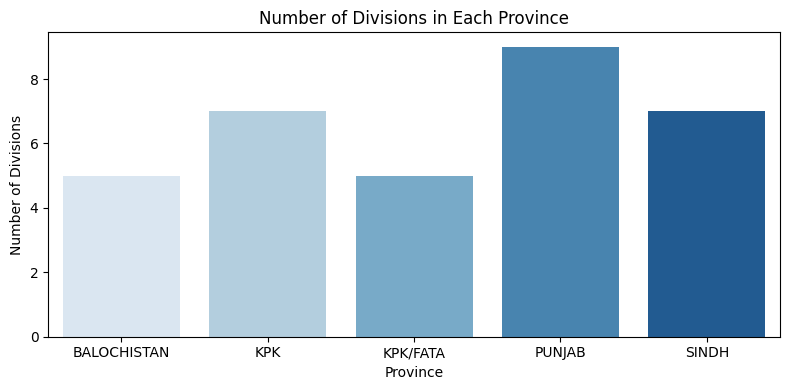

In [36]:
plt.figure(figsize=(8, 4))
sns.barplot(x=divisions_per_province.index, y=divisions_per_province.values, palette='Blues')
plt.title('Number of Divisions in Each Province')
plt.xlabel('Province')
plt.ylabel('Number of Divisions')
plt.tight_layout()
plt.show()

In [ ]:
# Number of districts in each province
districts_per_province = df.groupby('PROVINCE')['DISTRICT'].nunique()
print("Districts per province:\n", districts_per_province)

Districts per province:
 PROVINCE
BALOCHISTAN    31
KPK            23
KPK/FATA       12
PUNJAB         36
SINDH          29
Name: DISTRICT, dtype: int64


C:\Users\ACI\AppData\Local\Temp\ipykernel_10924\1208931365.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=districts_per_province.index, y=districts_per_province.values, palette='Greens')


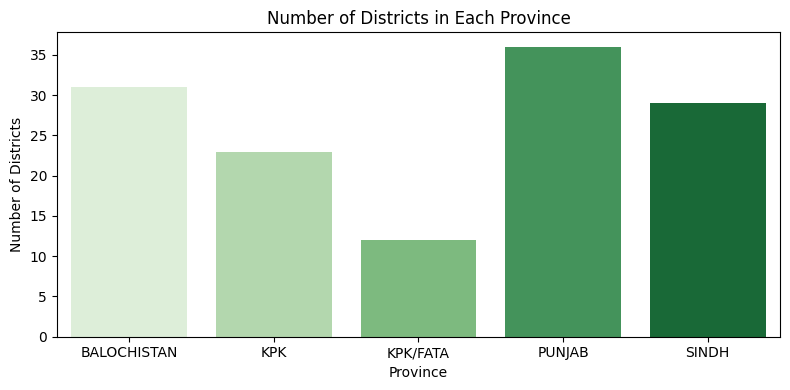

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=districts_per_province.index, y=districts_per_province.values, palette='Greens')
plt.title('Number of Districts in Each Province')
plt.xlabel('Province')
plt.ylabel('Number of Districts')
plt.tight_layout()
plt.show()

In [ ]:
# Number of sub-divisions in each province
subdivisions_per_province = df.groupby('PROVINCE')['SUB DIVISION'].nunique()
print("Sub-divisions per province:\n", subdivisions_per_province)

Sub-divisions per province:
 PROVINCE
BALOCHISTAN    131
KPK             71
KPK/FATA        46
PUNJAB         143
SINDH          137
Name: SUB DIVISION, dtype: int64


C:\Users\ACI\AppData\Local\Temp\ipykernel_10924\4042829287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subdivisions_per_province.index, y=subdivisions_per_province.values, palette='Oranges')


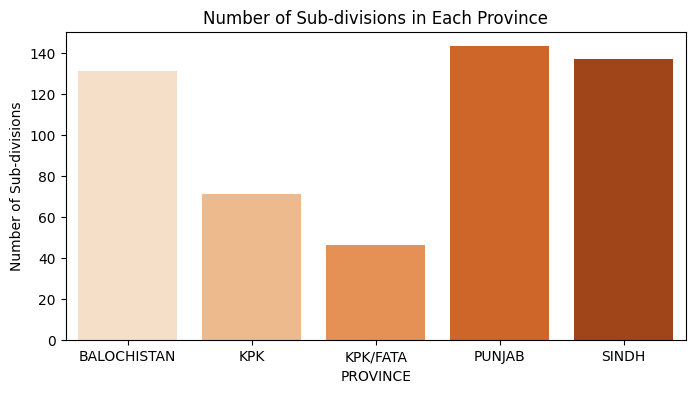

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=subdivisions_per_province.index, y=subdivisions_per_province.values, palette='Oranges')
plt.title('Number of Sub-divisions in Each Province')
plt.ylabel('Number of Sub-divisions')
plt.show()


In [ ]:
df.groupby('PROVINCE')[['DISTRICT', 'DIVISION', 'SUB DIVISION']].nunique()

,DISTRICT,DIVISION,SUB DIVISION
PROVINCE,,,
BALOCHISTAN,31,5,131
KPK,23,7,71
KPK/FATA,12,5,46
PUNJAB,36,9,143
SINDH,29,7,137


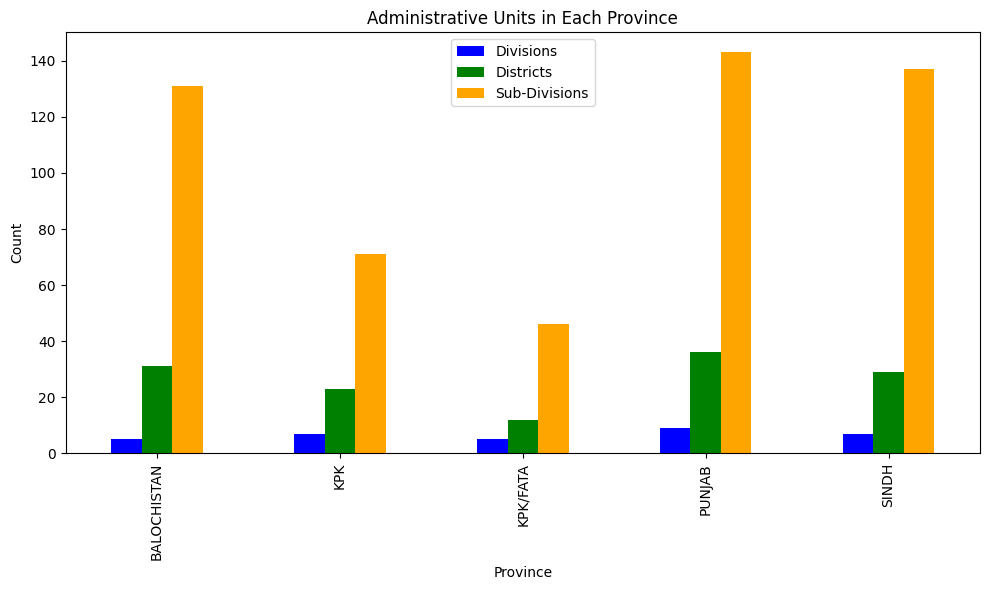

In [ ]:
admin_units.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'orange'])
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Administrative Units in Each Province')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48


In [ ]:
# area of each province
area_per_province = df.groupby('PROVINCE')['AREA (sq.km)'].sum().sort_values(ascending=False)

area_per_province

PROVINCE
BALOCHISTAN    345464.0
PUNJAB         202693.0
SINDH          140136.0
KPK             74957.1
KPK/FATA        24529.0
Name: AREA (sq.km), dtype: float64

In [ ]:
#total area of pakistan
area_per_province.sum()

np.float64(787779.1)

C:\Users\ACI\AppData\Local\Temp\ipykernel_10924\1217133260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_per_province.values, y=area_per_province.index, palette='Blues_r')


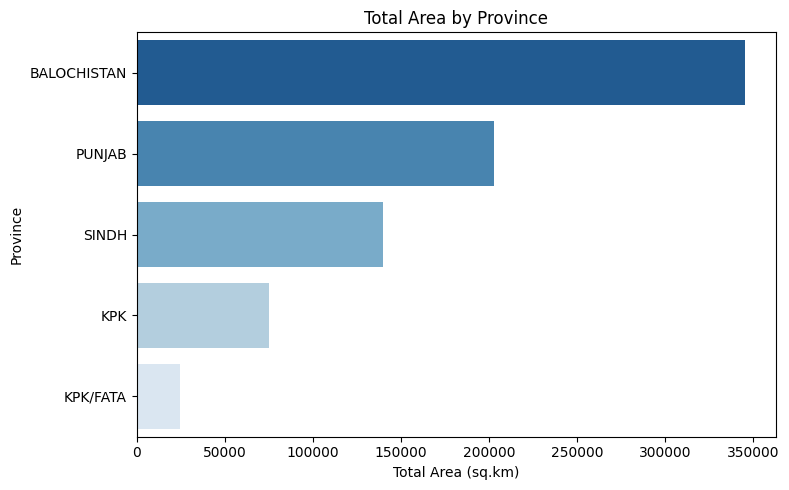

In [ ]:
# barplot for total area by provience 
plt.figure(figsize=(8, 5))
sns.barplot(x=area_per_province.values, y=area_per_province.index, palette='Blues_r')
plt.xlabel('Total Area (sq.km)')
plt.ylabel('Province')
plt.title('Total Area by Province')
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('PROVINCE')['AREA (sq.km)'].sum().sort_values(ascending=True)

PROVINCE
KPK/FATA        24529.0
KPK             74957.1
SINDH          140136.0
PUNJAB         202693.0
BALOCHISTAN    345464.0
Name: AREA (sq.km), dtype: float64

In [ ]:
# Finding division with the largest total AREA
total_AREA_division = df.groupby('DIVISION')['AREA (sq.km)'].sum().sort_values(ascending=False)
largest_division = total_AREA_division[0:1]

largest_division

DIVISION
Makran Division    143591.0
Name: AREA (sq.km), dtype: float64

In [ ]:
# creating a new column for total population
df['TOTAL POPULATION'] = df['ALL SEXES (RURAL)'] + df['ALL SEXES (URBAN)']

df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN),TOTAL POPULATION
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97,813390
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01,689766
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06,422768
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79,524715
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48,525017


In [ ]:
print("Answer: Total Population of Pakistan (2017): ", df['TOTAL POPULATION'].sum())

Answer: Total Population of Pakistan (2017):  204410733


In [ ]:
# first let's find total populaion by each division
print("Total Population by Division:")
total_pop_division = df.groupby('DIVISION')['TOTAL POPULATION'].sum().sort_values(ascending=False)

total_pop_division

Total Population by Division:


DIVISION
LAHORE DIVISION                 19389856
GUJRANWALA DIVISION             16120861
Karachi Division                16024894
FAISALABAD DIVISION             14185231
MULTAN DIVISION                 12268173
BAHAWALPUR DIVISION             11452594
D.G.KHAN DIVISION               10426847
RAWALPINDI DIVISION             10006624
MALAKAND DIVISION                9321400
Hyderabad Division               8780856
PESHAWAR DIVISION                8193690
SARGODHA DIVISION                7826342
SAHIWAL DIVISION                 7378065
Larkana Division                 6190926
Sukkur Division                  5542270
HAZARA DIVISION                  5323155
Shaheed Benazirabad Division     5275426
Quetta Division                  5097730
Mirpurkhas Division              4224945
MARDAN DIVISION                  3998876
KOHAT DIVISION                   2976107
DERA ISMAIL KHAN DIVISION        2759435
BANNU DIVISION                   2652867
Makran Division                  2508969
Badin D

C:\Users\ACI\AppData\Local\Temp\ipykernel_10924\4108496357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pop_division.values, y=total_pop_division.index, palette='mako')


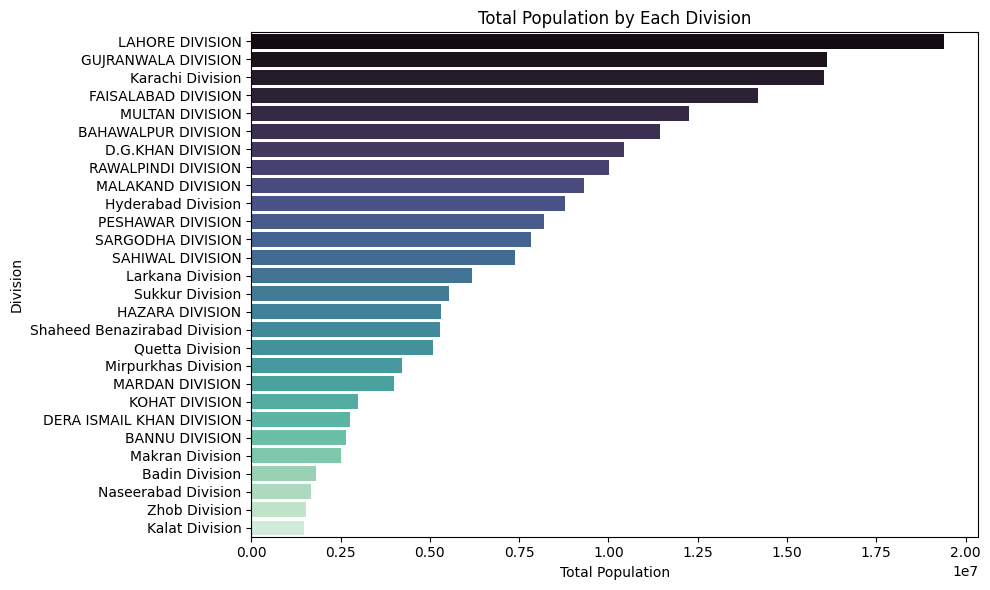

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_pop_division.values, y=total_pop_division.index, palette='mako')
plt.xlabel('Total Population')
plt.ylabel('Division')
plt.title('Total Population by Each Division')
plt.tight_layout()
plt.show()

In [ ]:
# now let's find the mean/avg population of each Division
print(" Answer: Average population of each Division:")
avg_pop_division = df.groupby('DIVISION')['TOTAL POPULATION'].mean().sort_values(ascending=False)

avg_pop_division

 Answer: Average population of each Division:


DIVISION
LAHORE DIVISION                 1.140580e+06
SAHIWAL DIVISION                1.054009e+06
MULTAN DIVISION                 8.762981e+05
FAISALABAD DIVISION             8.344254e+05
GUJRANWALA DIVISION             8.060431e+05
BAHAWALPUR DIVISION             7.635063e+05
D.G.KHAN DIVISION               7.447748e+05
MARDAN DIVISION                 5.712680e+05
Karachi Division                5.341631e+05
SARGODHA DIVISION               4.603731e+05
PESHAWAR DIVISION               4.552050e+05
RAWALPINDI DIVISION             4.548465e+05
Badin Division                  3.609916e+05
HAZARA DIVISION                 3.548770e+05
Shaheed Benazirabad Division    3.516951e+05
Sukkur Division                 3.079039e+05
Larkana Division                2.948060e+05
Hyderabad Division              2.926952e+05
MALAKAND DIVISION               2.824667e+05
Mirpurkhas Division             2.347192e+05
KOHAT DIVISION                  2.125791e+05
DERA ISMAIL KHAN DIVISION       1.839623e+05
B

C:\Users\ACI\AppData\Local\Temp\ipykernel_10924\3116816917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pop_division.values, y=avg_pop_division.index, palette='viridis')


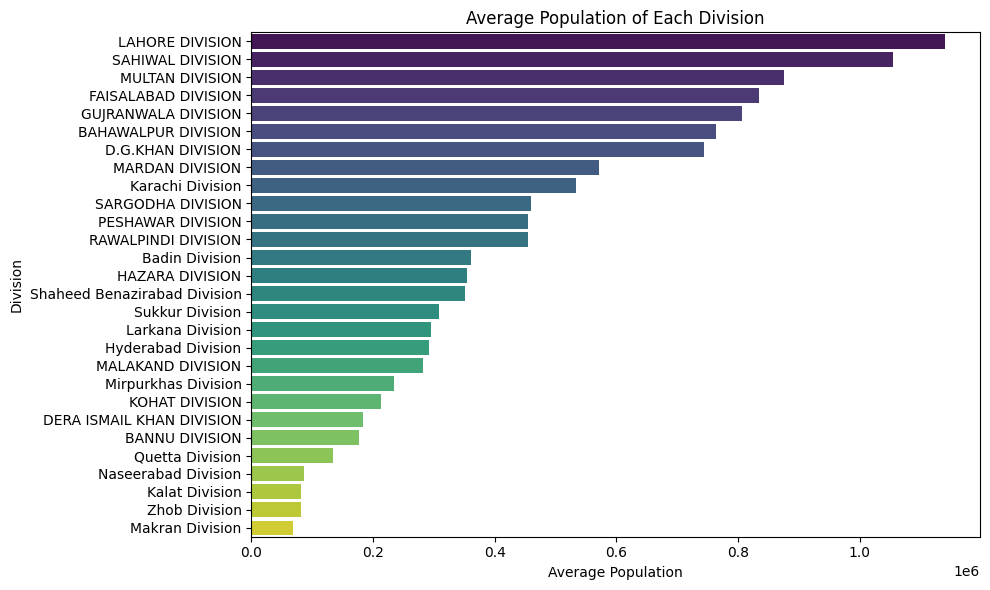

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pop_division.values, y=avg_pop_division.index, palette='viridis')
plt.xlabel('Average Population')
plt.ylabel('Division')
plt.title('Average Population of Each Division')
plt.tight_layout()
plt.show()

Total Population by Province:


C:\Users\ACI\AppData\Local\Temp\ipykernel_10924\25078597.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pop_province.values, y=total_pop_province.index, palette='mako')


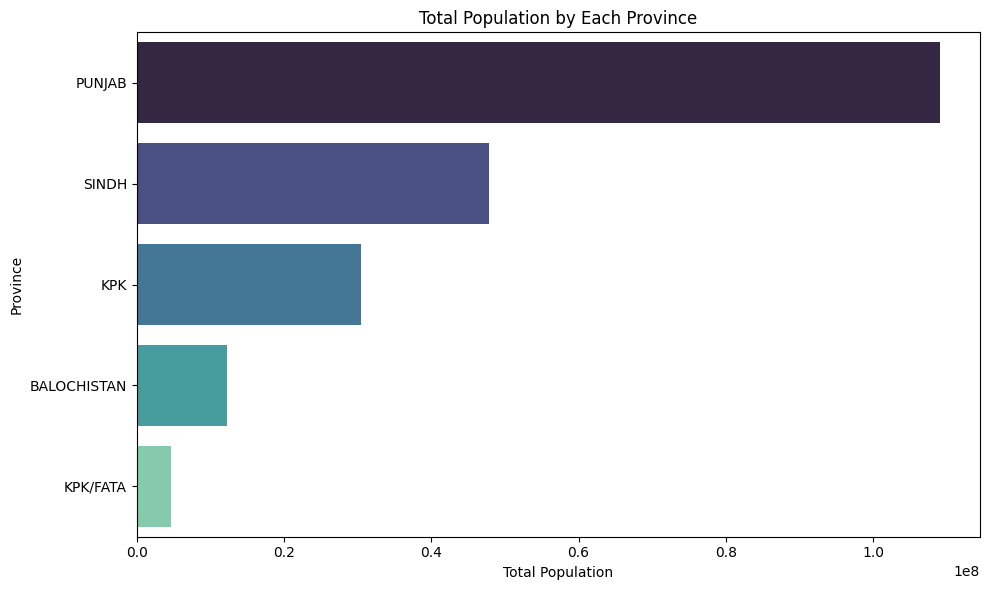

In [ ]:
# first let's find total population by each province
print("Total Population by Province:")
total_pop_province = df.groupby('PROVINCE')['TOTAL POPULATION'].sum().sort_values(ascending=False)

total_pop_province

plt.figure(figsize=(10, 6))
sns.barplot(x=total_pop_province.values, y=total_pop_province.index, palette='mako')
plt.xlabel('Total Population')
plt.ylabel('Province')
plt.title('Total Population by Each Province')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN),TOTAL POPULATION
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97,813390
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01,689766
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06,422768
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79,524715
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48,525017


In [ ]:
df.groupby('DIVISION')['TOTAL POPULATION'].sum()

DIVISION
BAHAWALPUR DIVISION             11452594
BANNU DIVISION                   2652867
Badin Division                   1804958
D.G.KHAN DIVISION               10426847
DERA ISMAIL KHAN DIVISION        2759435
FAISALABAD DIVISION             14185231
GUJRANWALA DIVISION             16120861
HAZARA DIVISION                  5323155
Hyderabad Division               8780856
KOHAT DIVISION                   2976107
Kalat Division                   1476630
Karachi Division                16024894
LAHORE DIVISION                 19389856
Larkana Division                 6190926
MALAKAND DIVISION                9321400
MARDAN DIVISION                  3998876
MULTAN DIVISION                 12268173
Makran Division                  2508969
Mirpurkhas Division              4224945
Naseerabad Division              1661077
PESHAWAR DIVISION                8193690
Quetta Division                  5097730
RAWALPINDI DIVISION             10006624
SAHIWAL DIVISION                 7378065
SARGODH

In [ ]:
# Finding division with the largest total population
total_pop_division = df.groupby('DIVISION')['TOTAL POPULATION'].sum().sort_values(ascending=False)
largest_division = total_pop_division[0:1]

largest_division

DIVISION
LAHORE DIVISION    19389856
Name: TOTAL POPULATION, dtype: int64

In [ ]:
# finding the province for LAHORE DIVISION
df[df['DIVISION'] == 'LAHORE DIVISION']['PROVINCE'].values[1]

'PUNJAB'

In [ ]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN),TOTAL POPULATION
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97,813390
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01,689766
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06,422768
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79,524715
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48,525017


In [ ]:
# population of each province
province_pop = df.groupby('PROVINCE')['TOTAL POPULATION'].sum().sort_values(ascending=False)

province_pop

PROVINCE
PUNJAB         109054593
SINDH           47844275
KPK             30497911
BALOCHISTAN     12286335
KPK/FATA         4727619
Name: TOTAL POPULATION, dtype: int64

C:\Users\ACI\AppData\Local\Temp\ipykernel_10924\1553473133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=province_pop.values, x=province_pop.index, palette='Blues_r')


<Axes: xlabel='PROVINCE'>

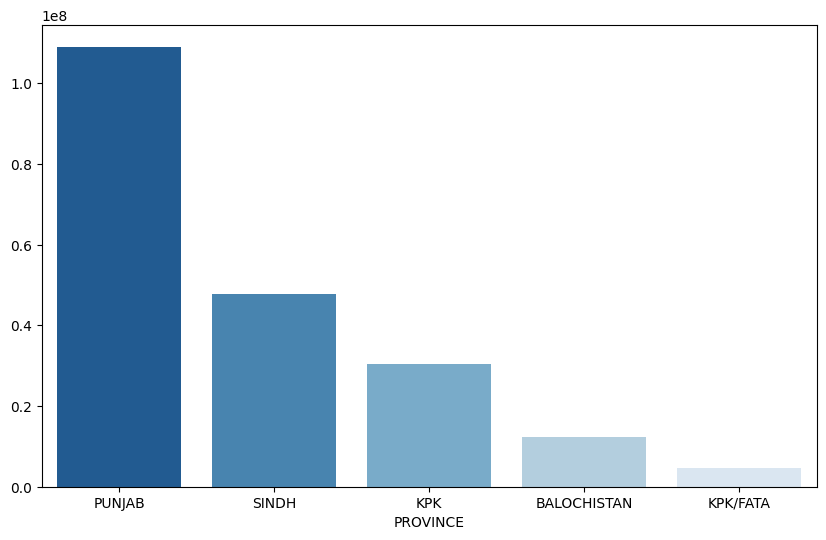

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=province_pop.values, x=province_pop.index, palette='Blues_r')

In [ ]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN),TOTAL POPULATION
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97,813390
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01,689766
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06,422768
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79,524715
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48,525017


In [ ]:
# Grouping by province and sum relevant gender columns
gender_distribution = df.groupby("PROVINCE")[
    ["MALE (RURAL)", "MALE (URBAN)", "FEMALE (RURAL)", "FEMALE (URBAN)"]
].sum()

gender_distribution

,MALE (RURAL),MALE (URBAN),FEMALE (RURAL),FEMALE (URBAN)
PROVINCE,,,,
BALOCHISTAN,4658709,1797980,4220436,1608430
KPK,12524211,2897645,12367532,2706563
KPK/FATA,2344159,73438,2243307,66406
PUNJAB,34695963,20743951,33961383,19640941
SINDH,11922521,12948294,11086973,11880533


In [ ]:
# creating new columns for Total Male and Female
gender_distribution["TOTAL MALE"] = gender_distribution["MALE (RURAL)"] + gender_distribution["MALE (URBAN)"]
gender_distribution["TOTAL FEMALE"] = gender_distribution["FEMALE (RURAL)"] + gender_distribution["FEMALE (URBAN)"]

gender_distribution

,MALE (RURAL),MALE (URBAN),FEMALE (RURAL),FEMALE (URBAN),TOTAL MALE,TOTAL FEMALE
PROVINCE,,,,,,
BALOCHISTAN,4658709,1797980,4220436,1608430,6456689,5828866
KPK,12524211,2897645,12367532,2706563,15421856,15074095
KPK/FATA,2344159,73438,2243307,66406,2417597,2309713
PUNJAB,34695963,20743951,33961383,19640941,55439914,53602324
SINDH,11922521,12948294,11086973,11880533,24870815,22967506


In [ ]:
print("Answer: Gender Distribution (male/female) in each province:")
gender_distribution_final = gender_distribution[["TOTAL MALE", "TOTAL FEMALE"]]
gender_distribution_final

Answer: Gender Distribution (male/female) in each province:


,TOTAL MALE,TOTAL FEMALE
PROVINCE,,
BALOCHISTAN,6456689,5828866
KPK,15421856,15074095
KPK/FATA,2417597,2309713
PUNJAB,55439914,53602324
SINDH,24870815,22967506


In [ ]:
# Calculating male-to-female ratio for each province
gender_distribution_final['TOTAL MALE'] / gender_distribution_final['TOTAL FEMALE']
gender_distribution_final

,TOTAL MALE,TOTAL FEMALE
PROVINCE,,
BALOCHISTAN,6456689,5828866
KPK,15421856,15074095
KPK/FATA,2417597,2309713
PUNJAB,55439914,53602324
SINDH,24870815,22967506


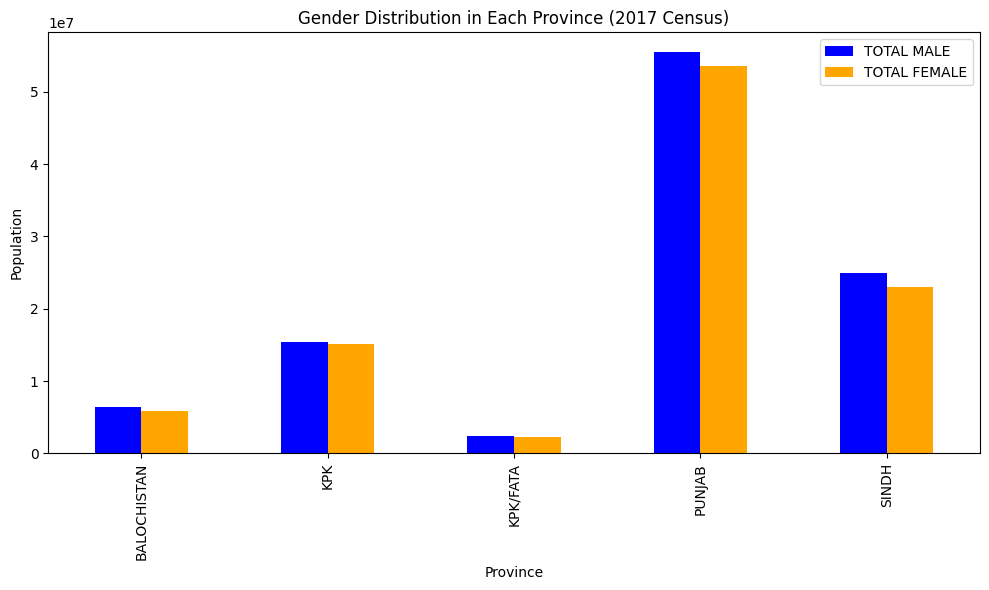

In [ ]:
gender_distribution_final.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Gender Distribution in Each Province (2017 Census)')
plt.xlabel('Province')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

In [ ]:
gender_distribution_final.sum()

TOTAL MALE      104606871
TOTAL FEMALE     99782504
dtype: int64

C:\Users\ACI\AppData\Local\Temp\ipykernel_10924\2835845219.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_male = gender_distribution_final.sum()[0]
C:\Users\ACI\AppData\Local\Temp\ipykernel_10924\2835845219.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_female = gender_distribution_final.sum()[1]


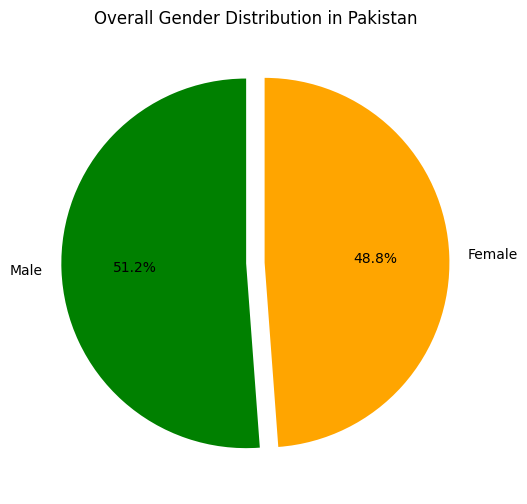

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for overall gender distribution in Pakistan
total_male = gender_distribution_final.sum()[0]
total_female = gender_distribution_final.sum()[1]

plt.figure(figsize=(6, 6))
plt.pie([total_male, total_female],
        labels=['Male', 'Female'],
        autopct='%1.1f%%',
        colors=['green', 'orange'],
        startangle=90,
        explode=(0.05, 0.05))
plt.title('Overall Gender Distribution in Pakistan')
plt.show()

In [ ]:
df.head()   

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN),TOTAL POPULATION
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97,813390
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01,689766
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06,422768
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79,524715
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48,525017


In [ ]:
# total rural population by provience
rural_population_province = df.groupby('PROVINCE')['ALL SEXES (RURAL)'].sum().sort_values(ascending=False)
rural_population_province

PROVINCE
PUNJAB         68662922
KPK            24892840
SINDH          23011641
BALOCHISTAN     8879634
KPK/FATA        4587753
Name: ALL SEXES (RURAL), dtype: int64

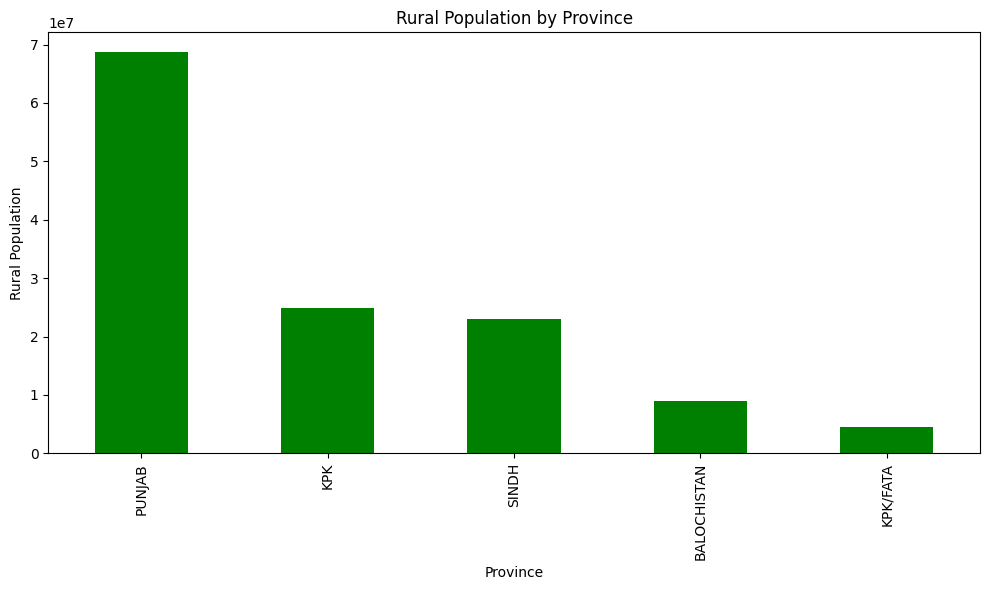

In [ ]:
rural_population_province.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Rural Population by Province')
plt.xlabel('Province')
plt.ylabel('Rural Population')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN),TOTAL POPULATION
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97,813390
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01,689766
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06,422768
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79,524715
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48,525017


In [ ]:
# grouping province for all sexes urban and rural population
urban_rural = df.groupby('PROVINCE')[['ALL SEXES (URBAN)', 'ALL SEXES (RURAL)']].sum()

urban_rural

,ALL SEXES (URBAN),ALL SEXES (RURAL)
PROVINCE,,
BALOCHISTAN,3406701,8879634
KPK,5605071,24892840
KPK/FATA,139866,4587753
PUNJAB,40391671,68662922
SINDH,24832634,23011641


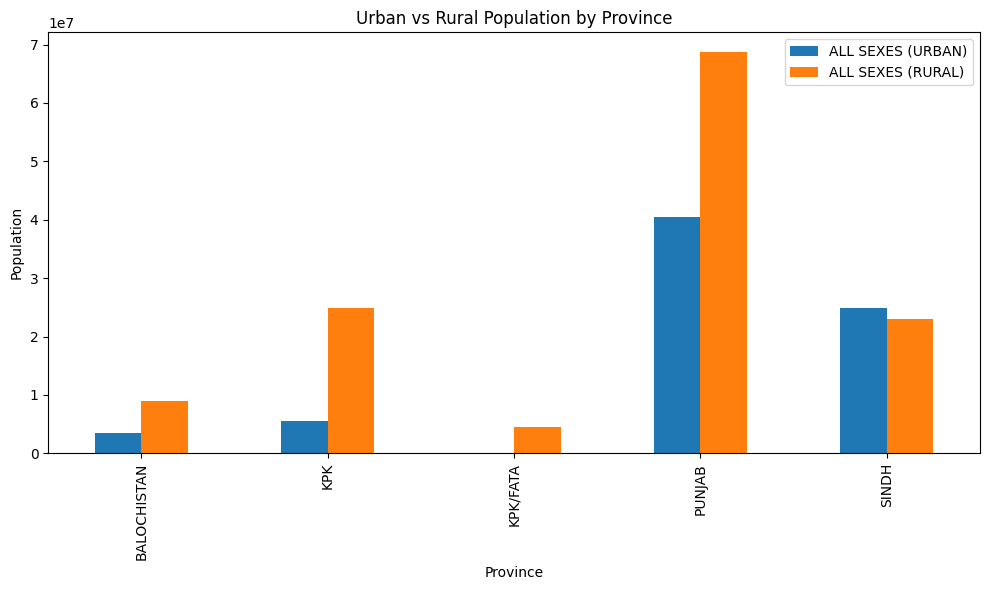

In [ ]:
# Bar plot Urban vs Rural population by province
urban_rural.plot(kind='bar', figsize=(10, 6))
plt.title('Urban vs Rural Population by Province')
plt.xlabel('Province')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

In [ ]:
print("Answer: Urban vs. Rural population in each province:")
urban_rural

Answer: Urban vs. Rural population in each province:


,ALL SEXES (URBAN),ALL SEXES (RURAL)
PROVINCE,,
BALOCHISTAN,3406701,8879634
KPK,5605071,24892840
KPK/FATA,139866,4587753
PUNJAB,40391671,68662922
SINDH,24832634,23011641


In [ ]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN),TOTAL POPULATION
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97,813390
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01,689766
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06,422768
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79,524715
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48,525017


In [ ]:
# grouping by province and summing up the population by gender columns 
sex_ratio = df.groupby('PROVINCE')[['MALE (RURAL)', 'MALE (URBAN)', 'FEMALE (RURAL)', 'FEMALE (URBAN)']].sum()
sex_ratio

,MALE (RURAL),MALE (URBAN),FEMALE (RURAL),FEMALE (URBAN)
PROVINCE,,,,
BALOCHISTAN,4658709,1797980,4220436,1608430
KPK,12524211,2897645,12367532,2706563
KPK/FATA,2344159,73438,2243307,66406
PUNJAB,34695963,20743951,33961383,19640941
SINDH,11922521,12948294,11086973,11880533


In [ ]:
# summing up the rural and urban population for both Male and Female
sex_ratio['TOTAL MALE'] = sex_ratio['MALE (RURAL)'] + sex_ratio['MALE (URBAN)']
sex_ratio['TOTAL FEMALE'] = sex_ratio['FEMALE (RURAL)'] + sex_ratio['FEMALE (URBAN)']

# Calculating sex ratio: females per 1000 males
sex_ratio['SEX RATIO'] = (sex_ratio['TOTAL FEMALE'] / sex_ratio['TOTAL MALE']) * 1000


sex_ratio[['TOTAL MALE', 'TOTAL FEMALE', 'SEX RATIO']]

,TOTAL MALE,TOTAL FEMALE,SEX RATIO
PROVINCE,,,
BALOCHISTAN,6456689,5828866,902.763940
KPK,15421856,15074095,977.450120
KPK/FATA,2417597,2309713,955.375524
PUNJAB,55439914,53602324,966.854386
SINDH,24870815,22967506,923.472190


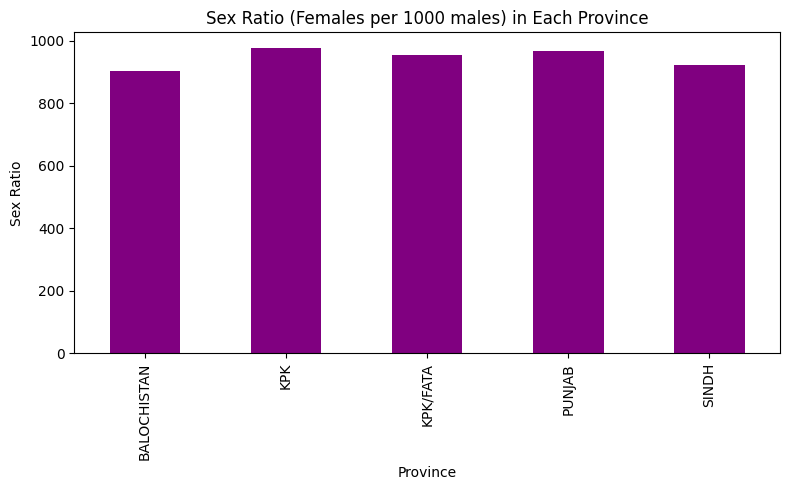

In [ ]:
sex_ratio['SEX RATIO'].plot(kind='bar', color='purple', figsize=(8, 5))
plt.title('Sex Ratio (Females per 1000 males) in Each Province')
plt.xlabel('Province')
plt.ylabel('Sex Ratio')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN),TOTAL POPULATION
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97,813390
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01,689766
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06,422768
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79,524715
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48,525017


In [ ]:
# Grouping by province and sum gender columns
sex_ratio_urban_rural = df.groupby('PROVINCE')[['MALE (URBAN)', 'FEMALE (URBAN)', 'MALE (RURAL)', 'FEMALE (RURAL)']].sum()

# Calculating sex ratio for urban and rural areas
sex_ratio_urban_rural['SEX RATIO URBAN'] = (sex_ratio_urban_rural['FEMALE (URBAN)'] / sex_ratio_urban_rural['MALE (URBAN)']) * 1000
sex_ratio_urban_rural['SEX RATIO RURAL'] = (sex_ratio_urban_rural['FEMALE (RURAL)'] / sex_ratio_urban_rural['MALE (RURAL)']) * 1000


In [ ]:
sex_ratio_urban_rural[['SEX RATIO URBAN', 'SEX RATIO RURAL']]

,SEX RATIO URBAN,SEX RATIO RURAL
PROVINCE,,
BALOCHISTAN,894.576135,905.923937
KPK,934.056104,987.489911
KPK/FATA,904.245758,956.977321
PUNJAB,946.827391,978.828084
SINDH,917.536550,929.918513


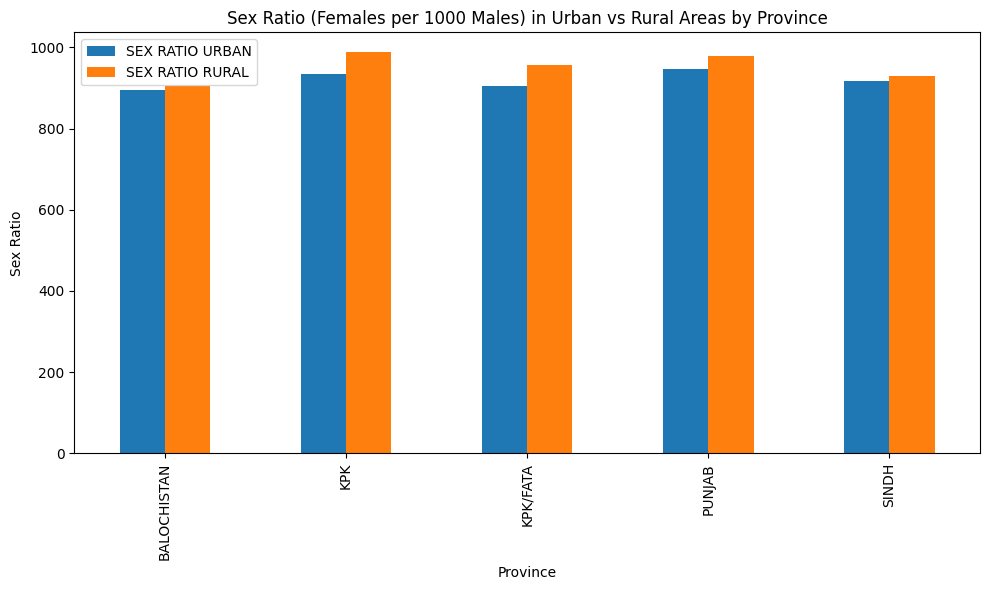

In [ ]:
sex_ratio_urban_rural[['SEX RATIO URBAN', 'SEX RATIO RURAL']].plot(kind='bar', figsize=(10, 6))
plt.title('Sex Ratio (Females per 1000 Males) in Urban vs Rural Areas by Province')
plt.xlabel('Province')
plt.ylabel('Sex Ratio')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN),TOTAL POPULATION
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97,813390
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01,689766
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06,422768
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79,524715
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48,525017


In [ ]:
# average household size rural area
avg_house_size_rural = df.groupby('PROVINCE')['AVG HOUSEHOLD SIZE (RURAL)'].mean()
avg_house_size_rural

PROVINCE
BALOCHISTAN    6.597099
KPK            8.089437
KPK/FATA       8.683478
PUNJAB         6.146783
SINDH          4.359781
Name: AVG HOUSEHOLD SIZE (RURAL), dtype: float64

In [ ]:
# average household size urban area
avg_house_size_urban = df.groupby('PROVINCE')['AVG HOUSEHOLD SIZE (URBAN)'].mean()
avg_house_size_urban

PROVINCE
BALOCHISTAN    2.916336
KPK            4.297887
KPK/FATA       0.861739
PUNJAB         6.127343
SINDH          5.281314
Name: AVG HOUSEHOLD SIZE (URBAN), dtype: float64

In [ ]:
print("Answer: Difference in Average Household Size (Rural - Urban)")
avg_house_size_diff = avg_house_size_rural - avg_house_size_urban
avg_house_size_diff

Answer: Difference in Average Household Size (Rural - Urban)


PROVINCE
BALOCHISTAN    3.680763
KPK            3.791549
KPK/FATA       7.821739
PUNJAB         0.019441
SINDH         -0.921533
dtype: float64

In [ ]:
# creating a new column for total population 1998
df['POPULATION 1998 (TOTAL)'] = df['POPULATION 1998 (URBAN)'] + df['POPULATION 1998 (RURAL)']

df.head()

,PROVINCE,DIVISION,DISTRICT,SUB DIVISION,AREA (sq.km),ALL SEXES (RURAL),MALE (RURAL),FEMALE (RURAL),TRANSGENDER (RURAL),SEX RATIO (RURAL),AVG HOUSEHOLD SIZE (RURAL),POPULATION 1998 (RURAL),ANNUAL GROWTH RATE (RURAL),ALL SEXES (URBAN),MALE (URBAN),FEMALE (URBAN),TRANSGENDER (URBAN),SEX RATIO (URBAN),AVG HOUSEHOLD SIZE (URBAN),POPULATION 1998 (URBAN),ANNUAL GROWTH RATE (URBAN),TOTAL POPULATION,POPULATION 1998 (TOTAL)
0,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,BAHAWALNAGAR TEHSIL,1729.0,619550,316864,302644,42,104.70,6.10,407768,2.22,193840,98391,95402,47,103.13,6.02,133785,1.97,813390,541553
1,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,CHISHTIAN TEHSIL,1500.0,540342,273788,266500,54,102.73,6.15,395983,1.65,149424,75546,73851,27,102.30,6.01,102287,2.01,689766,498270
2,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,FORT ABBAS TEHSIL,2536.0,361240,182655,178541,44,102.30,6.32,250959,1.93,61528,31360,30150,18,104.01,6.00,34637,3.06,422768,285596
3,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,HAROONABAD TEHSIL,1295.0,382115,192278,189808,29,101.30,6.15,297343,1.33,142600,71345,71236,19,100.15,6.02,84424,2.79,524715,381767
4,PUNJAB,BAHAWALPUR DIVISION,BAHAWALNAGAR DISTRICT,MINCHINABAD TEHSIL,1818.0,452723,231506,221178,39,104.67,6.29,316593,1.90,72294,36694,35590,10,103.10,6.34,37668,3.48,525017,354261


In [ ]:
# total pop in 1998 by province
total_pop_1998 = df.groupby('PROVINCE')['POPULATION 1998 (TOTAL)'].sum().sort_values(ascending=False)

print("Answer: Total Population in 1998 by Province:")
total_pop_1998

Answer: Total Population in 1998 by Province:


PROVINCE
PUNJAB         73004786
SINDH          30429937
KPK            17776387
BALOCHISTAN     6539503
KPK/FATA        2967699
Name: POPULATION 1998 (TOTAL), dtype: int64

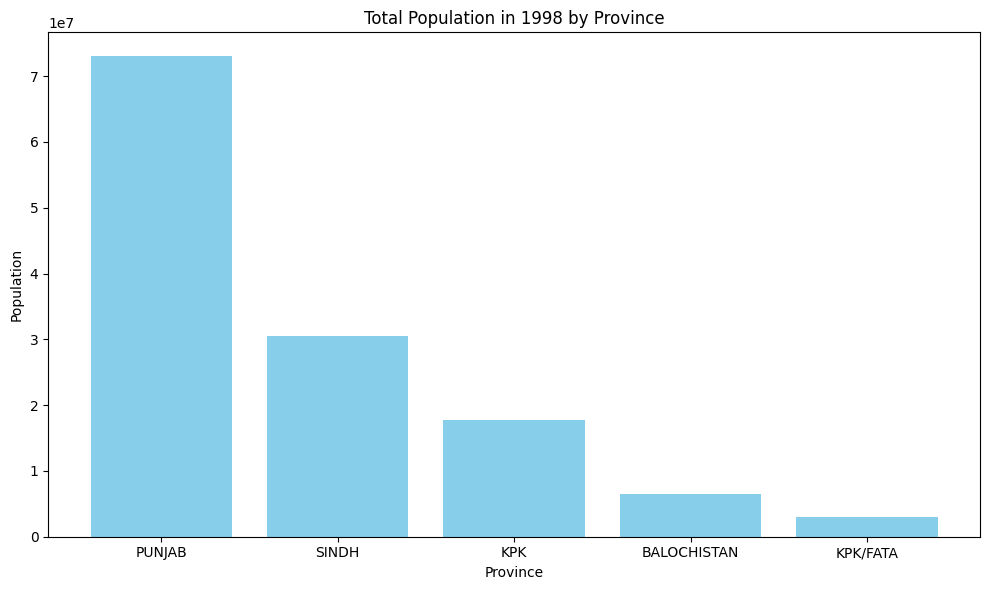

In [ ]:
# plotting total population in 1998 by province
plt.figure(figsize=(10, 6))
plt.bar(total_pop_1998.index, total_pop_1998.values, color='skyblue')
plt.title('Total Population in 1998 by Province')
plt.xlabel('Province')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

In [ ]:
province_pop_2017 = df.groupby('PROVINCE')['TOTAL POPULATION'].sum()
province_pop_1998 = df.groupby('PROVINCE')['POPULATION 1998 (TOTAL)'].sum()
pop_growth_rate_province = ((province_pop_2017 - province_pop_1998) / province_pop_1998) * 100

print("Answer: Population Growth Rate from 1998 to 2017 by Province:")
pop_growth_rate_province

Answer: Population Growth Rate from 1998 to 2017 by Province:


PROVINCE
BALOCHISTAN    87.878727
KPK            71.564171
KPK/FATA       59.302510
PUNJAB         49.380060
SINDH          57.227651
dtype: float64

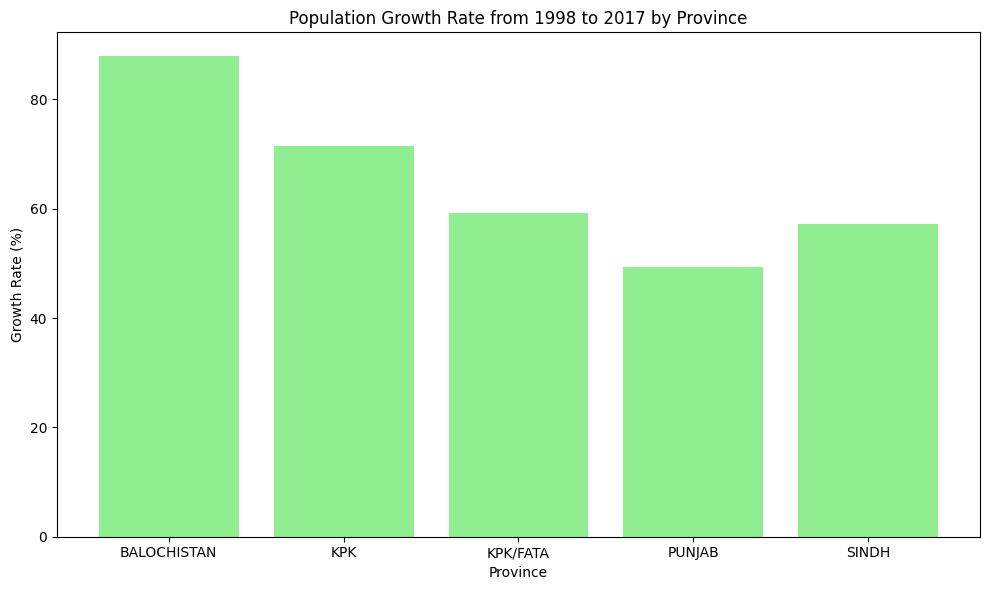

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(pop_growth_rate_province.index, pop_growth_rate_province.values, color='lightgreen')
plt.title('Population Growth Rate from 1998 to 2017 by Province')
plt.xlabel('Province')
plt.ylabel('Growth Rate (%)')
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROVINCE                    528 non-null    object 
 1   DIVISION                    528 non-null    object 
 2   DISTRICT                    528 non-null    object 
 3   SUB DIVISION                528 non-null    object 
 4   AREA (sq.km)                528 non-null    float64
 5   ALL SEXES (RURAL)           528 non-null    int64  
 6   MALE (RURAL)                528 non-null    int64  
 7   FEMALE (RURAL)              528 non-null    int64  
 8   TRANSGENDER (RURAL)         528 non-null    int64  
 9   SEX RATIO (RURAL)           528 non-null    float64
 10  AVG HOUSEHOLD SIZE (RURAL)  528 non-null    float64
 11  POPULATION 1998 (RURAL)     528 non-null    int64  
 12  ANNUAL GROWTH RATE (RURAL)  528 non-null    float64
 13  ALL SEXES (URBAN)           528 non

In [ ]:
# Finding division with the largest total population
total_pop_division = df.groupby('DIVISION')['TOTAL POPULATION'].sum().sort_values(ascending=False)
largest_division = total_pop_division[0:1]

largest_division

DIVISION
LAHORE DIVISION    19389856
Name: TOTAL POPULATION, dtype: int64

In [ ]:
# Finding division with the largest  total population DISTRICT
total_pop_division = df.groupby('DISTRICT')['TOTAL POPULATION'].sum().sort_values(ascending=False)
largest_district = total_pop_division[0:1]

largest_district

DISTRICT
LAHORE DISTRICT    11119985
Name: TOTAL POPULATION, dtype: int64

In [ ]:
# Finding division with the largest total population SUB DIVISION
total_pop_SUB_DIVISION = df.groupby('SUB DIVISION')['TOTAL POPULATION'].sum().sort_values(ascending=False)
largest_sub_division = total_pop_SUB_DIVISION[0:1]

largest_sub_division

SUB DIVISION
PESHAWAR TEHSIL    4267198
Name: TOTAL POPULATION, dtype: int64

In [ ]:
# Finding division with the largest AREA
total_AREA_DIVISION = df.groupby('DIVISION')['AREA (sq.km)'].sum().sort_values(ascending=False)
largest_AREA_DIVISION = total_AREA_DIVISION[0:1]

largest_AREA_DIVISION

DIVISION
Makran Division    143591.0
Name: AREA (sq.km), dtype: float64

In [ ]:
# Finding division with the largest AREA
total_AREA_DISTRICT = df.groupby('DISTRICT')['AREA (sq.km)'].sum().sort_values(ascending=False)
largest_AREA_DISTRICT = total_AREA_DISTRICT[0:1]

largest_AREA_DISTRICT

DISTRICT
CHAGAI DISTRICT    44748.0
Name: AREA (sq.km), dtype: float64

In [ ]:
# Finding division with the largest AREA
total_AREA_SUBDIVISION = df.groupby('SUB DIVISION')['AREA (sq.km)'].sum().sort_values(ascending=False)
largest_AREA_SUBDIVISION = total_AREA_SUBDIVISION[0:1]

largest_AREA_SUBDIVISION

SUB DIVISION
YAZMAN TEHSIL    18374.0
Name: AREA (sq.km), dtype: float64